In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

## Plot the map on screen

In [2]:

romania_map = dict(
    Arad=dict(Zerind=75, Sibiu=140, Timisoara=118),
    Bucharest=dict(Urziceni=85, Pitesti=101, Giurgiu=90, Fagaras=211),
    Craiova=dict(Drobeta=120, Rimnicu=146, Pitesti=138),
    Drobeta=dict(Mehadia=75),
    Eforie=dict(Hirsova=86),
    Fagaras=dict(Sibiu=99),
    Hirsova=dict(Urziceni=98),
    Iasi=dict(Vaslui=92, Neamt=87),
    Lugoj=dict(Timisoara=111, Mehadia=70),
    Oradea=dict(Zerind=71, Sibiu=151),
    Pitesti=dict(Rimnicu=97),
    Rimnicu=dict(Sibiu=80),
    Urziceni=dict(Vaslui=142))

romania_map_locations = dict(
    Arad=(91, 492), Bucharest=(400, 327), Craiova=(253, 288),
    Drobeta=(165, 299), Eforie=(562, 293), Fagaras=(305, 449),
    Giurgiu=(375, 270), Hirsova=(534, 350), Iasi=(473, 506),
    Lugoj=(165, 379), Mehadia=(168, 339), Neamt=(406, 537),
    Oradea=(131, 571), Pitesti=(320, 368), Rimnicu=(233, 410),
    Sibiu=(207, 457), Timisoara=(94, 410), Urziceni=(456, 350),
    Vaslui=(509, 444), Zerind=(108, 531))


In [3]:
x_max = -float('inf')
x_min = float('inf')

y_max = -float('inf')
y_min = float('inf')

x = []
y = []
names = []

for city in romania_map_locations:
    if romania_map_locations[city][0] < x_min:
        x_min = romania_map_locations[city][0]
    if romania_map_locations[city][0] > x_max:
        x_max = romania_map_locations[city][0]
        
    if romania_map_locations[city][1] < y_min:
        y_min = romania_map_locations[city][1]
    if romania_map_locations[city][1] > y_max:
        y_max = romania_map_locations[city][1]
    
    x.append(romania_map_locations[city][0])
    y.append(romania_map_locations[city][1])
    names.append(city)
    
        
if x_max > y_max:
    the_max = x_max
else:
    the_max = y_max


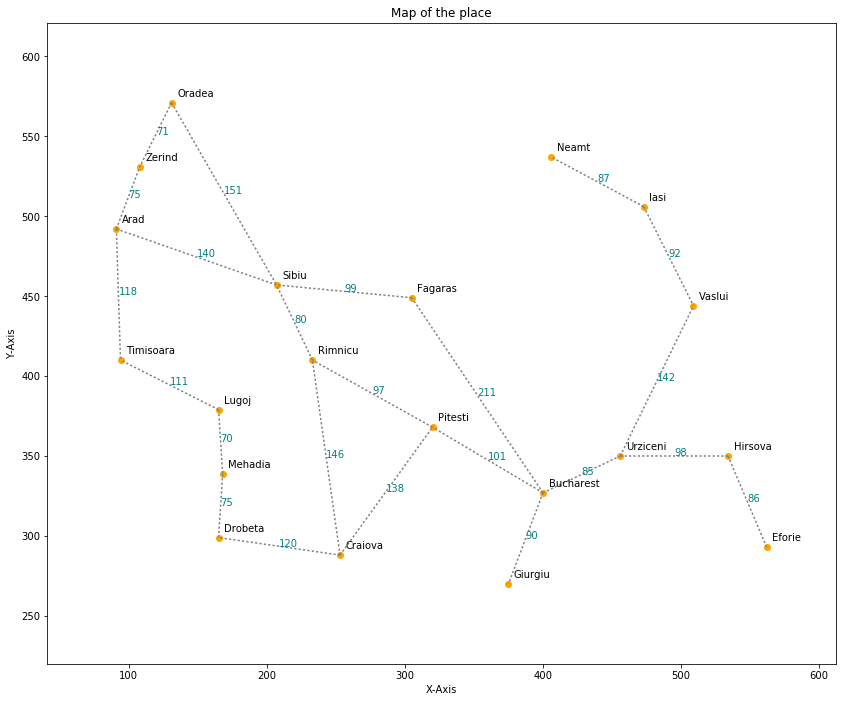

In [4]:
border = 50
fig = plt.figure()
sp = fig.add_subplot(111)
sp.set(xlim=[x_min-border, x_max+border], ylim=[y_min-border, y_max+border], title='Map of the place', ylabel='Y-Axis', xlabel='X-Axis')

sp.scatter(x, y, color='orange', marker='o')

for i, name in enumerate(names):
    sp.annotate(name, (x[i] + 4,y[i] + 4))


    
for city in romania_map:
    for target in romania_map[city]:
        x1 = romania_map_locations[city][0]
        y1 = romania_map_locations[city][1]
        x2 = romania_map_locations[target][0]
        y2 = romania_map_locations[target][1]
        lines, = sp.plot([x1, x2], [y1, y2], color='gray')
        lines.set_linestyle(':')
        distance = str(romania_map[city][target])
        xa = min(x1, x2)
        xb = max(x1, x2)
        ya = min(y1, y2)
        yb = max(y1, y2)
        sp.annotate(distance, (xa + (xb-xa)/2, (ya + (yb-ya)/2)), color='teal')
        

plt.tight_layout(pad=-20)

plt.plot()
plt.show()




## The Graph class - which encapsulates the graph (and prints it too)

In [5]:
class Graph(object):
    
    def __init__(self, dictionary=None, locations=None, directed=True):
        self.dictionary = dictionary or {}
        self.directed = directed
        self.locations = locations
        if not self.directed:
            self.make_undirected()
            
    def make_undirected(self):
        for city in list(self.dictionary.keys()):
            for (target, cost) in self.dictionary[city].items():
                self.connect_nodes(city, target, cost)
    
    def connect_nodes(self, a, b, cost):
        self.connect_nodes_helper(a, b, cost)
        if not self.directed:
            self.connect_nodes_helper(b, a, cost)
    
    def connect_nodes_helper(self, a, b, cost):
        self.dictionary.setdefault(a, {})[b] = cost
        
    def get_nodes(self):
        return list(self.dictionary.keys())
    
    def get_connections(self, a, b=None):
        connections = self.dictionary.setdefault(a, {})
        if b is None:
            return connections
        else:
            return connections[b]
        
    def plot(self):
        if self.locations is None:
            print("No locations given. Cannot plot.")
            return
        
        x_max = -float('inf')
        x_min = float('inf')

        y_max = -float('inf')
        y_min = float('inf')

        x = []
        y = []
        names = []

        for city in self.locations:
            if self.locations[city][0] < x_min:
                x_min = self.locations[city][0]
            if self.locations[city][0] > x_max:
                x_max = self.locations[city][0]

            if self.locations[city][1] < y_min:
                y_min = self.locations[city][1]
            if self.locations[city][1] > y_max:
                y_max = self.locations[city][1]

            x.append(self.locations[city][0])
            y.append(self.locations[city][1])
            names.append(city)


        if x_max > y_max:
            the_max = x_max
        else:
            the_max = y_max
            
        border = 50
        fig = plt.figure()
        sp = fig.add_subplot(111)
        sp.set(xlim=[x_min-border, x_max+border], ylim=[y_min-border, y_max+border], 
               title='Map of the place', ylabel='Y-Axis', xlabel='X-Axis')

        sp.scatter(x, y, color='orange', marker='o')

        for i, name in enumerate(names):
            sp.annotate(name, (x[i] + 4,y[i] + 4))

        for city in self.dictionary:
            for target in self.dictionary[city]:
                x1 = self.locations[city][0]
                y1 = self.locations[city][1]
                x2 = self.locations[target][0]
                y2 = self.locations[target][1]
                lines, = sp.plot([x1, x2], [y1, y2], color='gray')
                lines.set_linestyle(':')
                distance = str(self.dictionary[city][target])
                xa = min(x1, x2)
                xb = max(x1, x2)
                ya = min(y1, y2)
                yb = max(y1, y2)
                sp.annotate(distance, (xa + (xb-xa)/2, (ya + (yb-ya)/2)), color='teal')


        plt.tight_layout(pad=-20)

        plt.plot()
        plt.show()
        
        
        

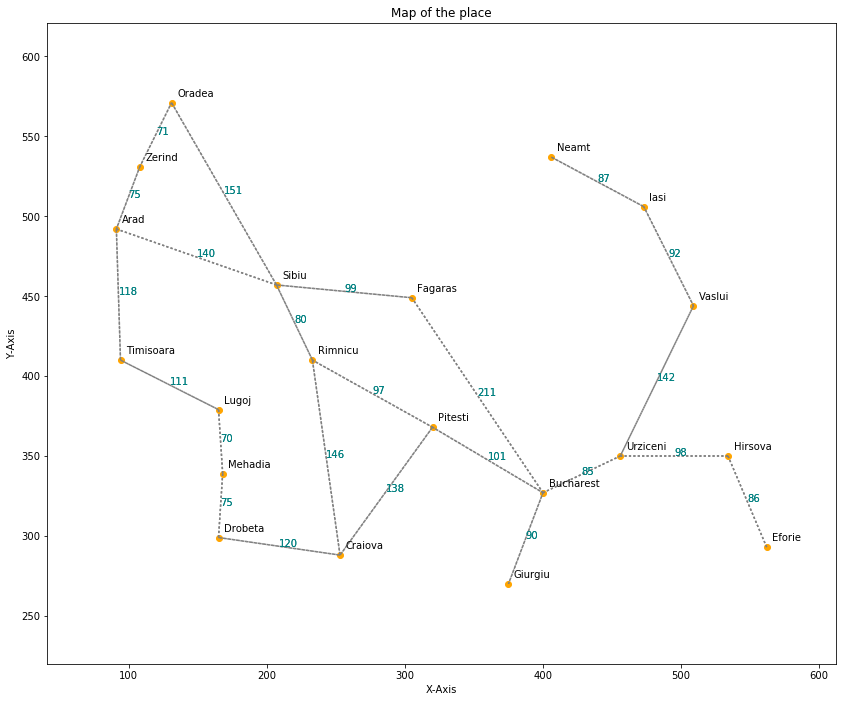

118
{'Bucharest': 85, 'Hirsova': 98, 'Vaslui': 142}


In [6]:
g = Graph(romania_map, romania_map_locations, False)
g.plot()
print(g.get_connections('Arad', 'Timisoara'))
print(g.get_connections('Urziceni'))

In [7]:
class GraphProblem(object):
    """The Problem Definition"""
    def __init__(self, graph, initial_state, goal_state):
        self.initial_state = initial_state
        self.goal_state = goal_state
        self.graph = graph
      
    
    def actions(self, state):
        return list(self.graph.get_connections(state))
    
    
    def results(self, state, action):
        if action in self.graph.get_connections(state):
            return action
        else:
            return None
        
        
    def goal_test(self, state):
        return self.goal_state == state
    
    
    def path_cost(self, c, state1, state2, action):
        return c + self.graph.get_connections(state1, state2)
        

In [8]:
g = Graph(romania_map, romania_map_locations, False)
gp = GraphProblem(g, 'Arad', 'Bucharest')
print (gp.actions('Urziceni'))
print (gp.results('Sibiu','Arad'))
print (gp.path_cost(10, 'Arad', 'Timisoara', 'Timisoara'))

['Bucharest', 'Hirsova', 'Vaslui']
Arad
128


In [18]:
import queue

def tree_search(problem):
    
    # Initialise Queue (FIFO)
    frontier = queue.Queue()
    frontier.put(problem.initial_state)
    finish = problem.goal_state
    
    # Algorithm starts
    while not frontier.empty():
        path = frontier.get()
        print("->", path)
        if problem.goal_test(path):
            return True, path
        
        paths = problem.actions(path)
        for p in paths:
            frontier.put(p)
        
    return False, None

In [19]:
gp = GraphProblem(g, 'Arad', 'Lugoj')
result, path = tree_search(gp)
print(result)
print(path)

-> Arad
-> Sibiu
-> Zerind
-> Timisoara
-> Oradea
-> Rimnicu
-> Fagaras
-> Arad
-> Oradea
-> Arad
-> Lugoj
True
Lugoj
